<center><h1 style="color:purple;">DATA MINING</h1></center>

# Reading Dataset

In this phase, I imported necessary libraries and read my dataset from "data.csv" file. I make a very little observation and I noticed that first row is meaningless and some columns contain too many missing values. So I have to handle them in the preprocessing phase.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [3]:
print("Data len:", len(data))
print("Attribute count:", len(data.columns))

Data len: 78096
Attribute count: 38


Here I checked length of our dataset and number of ourr attributes. I can say that we have relatively large number of data.

# Data Preprocessing

Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format. 

#### Adjusting Values

Here I converted values that symbolized with '?' symbol to NaN values. So that I could calculate number of missing values by using ".isnull()" method.

In [4]:
data.replace("?",np.nan,inplace=True)

In [5]:
data.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

As you can observe above, our dataset contains too many missing values. So we must handle them with different techniques like dropping some columns, rows and replacing NaN values with new values(zero value, mean value, median value etc.)

#### Dropping Some Columns

Here I dropped some of the columns directly because they contain too many null values compared to our data number. For example we have totally 78096 data and "Z11" column contains "78064" missing values which is almost the entire data so I dropped it and 
similar columns directly.

In [6]:
data = data.iloc[: , :17]

Then I dropped rows that contain more than or equal to 3 missing values.

In [7]:
data.dropna(thresh = 15, inplace = True) # Dropped rows that contains more than or equal to 3 NaN values.
data.isnull().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
dtype: int64

In the end, I checked null values of dataset and I observed that there is no more missing values so I pass to setting column types. But before passing, I dropped duplicated values because we have 17 different atributes now and if all the attributes have same values in different two rows, it would be probably a mistake.

In [8]:
data.drop_duplicates(inplace=True)

#### Setting Column Types

First of all I checked attributes types and I observed that I have some attributes in "object" type. I converted them to "float" type in order to make arithmetic calculations on them easily in the future.

In [9]:
print(data.dtypes)

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3        object
Y3        object
Z3        object
X4        object
Y4        object
Z4        object
dtype: object


In [10]:
data[['X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4']] = data[['X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4']].apply(pd.to_numeric)

In [11]:
print(data.dtypes)

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3       float64
Y3       float64
Z3       float64
X4       float64
Y4       float64
Z4       float64
dtype: object


As you can see above, we don't have any "object" typed attribute now.

In [12]:
data.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749220,-73.684130,59.188576,10.678936,-71.297781
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146


Here I checked my dataset one more time and I realized that I haven't dropped meaningless first row yet so I dropped it here and finished data preprocessing phase completely.

In [13]:
data = data.iloc[1:, :]

# Data Visualization

Data visualization refers to the techniques involved in graphically representing data, using visual elements like charts and graphs. It helps you to spot trends, patterns, and outliers, for quick insights and to make better decisions.

In [14]:
data.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
count,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000,74975.000000
mean,3.037492,7.921814,50.541952,86.216515,-29.564483,49.693789,86.825867,-29.078462,48.596300,84.867055,-29.712289,48.364859,82.958843,-30.424881,48.406087,80.419506,-31.993556
std,1.410292,4.635038,32.879905,40.279685,34.308915,32.729479,40.493706,34.759461,33.911617,40.987383,35.213092,34.164964,41.620591,35.974053,34.226361,42.623146,36.398277
min,1.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-130.062866,-103.961919,-100.789312,-125.113866,-111.761053,-97.603414,-143.540529,-99.107635,-97.948829,-157.199089
25%,2.000000,5.000000,29.305251,63.806352,-55.787776,28.487476,64.713731,-56.901362,24.429098,59.776469,-58.208141,23.017850,55.361676,-58.981272,22.829056,48.960422,-60.548201
50%,3.000000,9.000000,54.606012,86.937412,-30.197774,54.155264,88.048569,-29.535799,53.596756,87.639292,-30.971452,53.820032,86.773800,-32.601098,53.856778,85.777670,-35.165459
75%,4.000000,12.000000,73.090782,115.747691,-1.284034,72.186055,119.376682,-0.245141,71.964091,111.014947,-0.216325,71.690985,106.853362,-0.663836,71.970195,105.483241,-2.141662
max,5.000000,14.000000,163.329840,169.175464,113.345119,165.975416,170.209350,104.697852,163.547310,168.186466,104.590879,151.033472,168.292018,129.316870,172.275978,168.258643,119.237203


Before visualization, I printed description of my dataset. I noticed that we may have some outliers so I printed boxplot of some of my attributes to get more insights about it.

#### Outlier Visualization

As you can see below, we have too many outliers in dataset so we must handle them.

<AxesSubplot:>

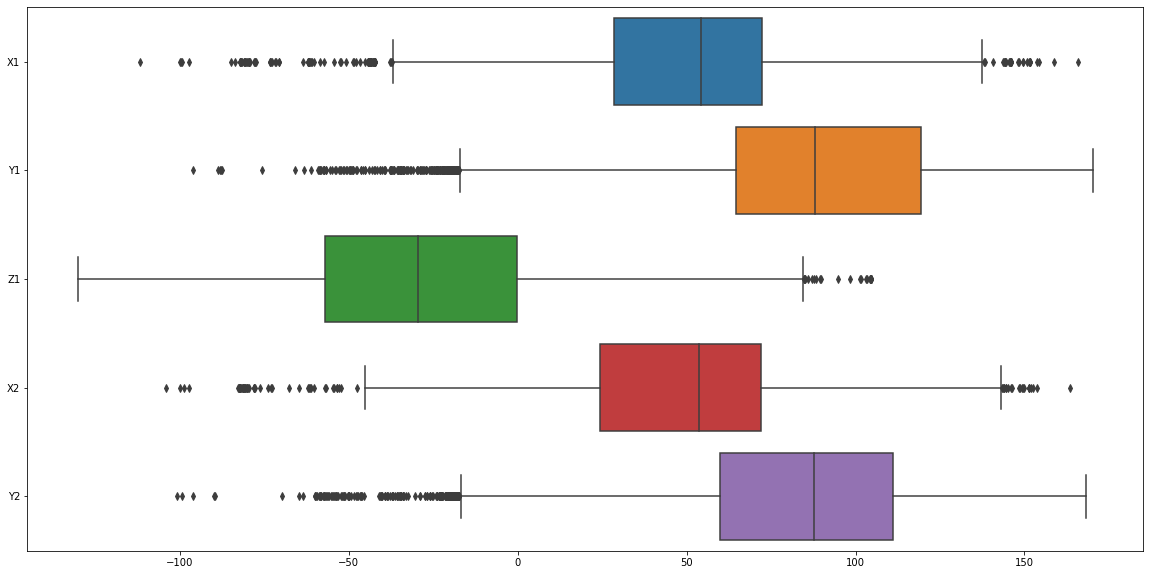

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data.iloc[:,5:10], orient="h")

In [16]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

After handling them most of the outliers are handled. I didn't handled all of them in order not to decrease my data size too much.

<AxesSubplot:>

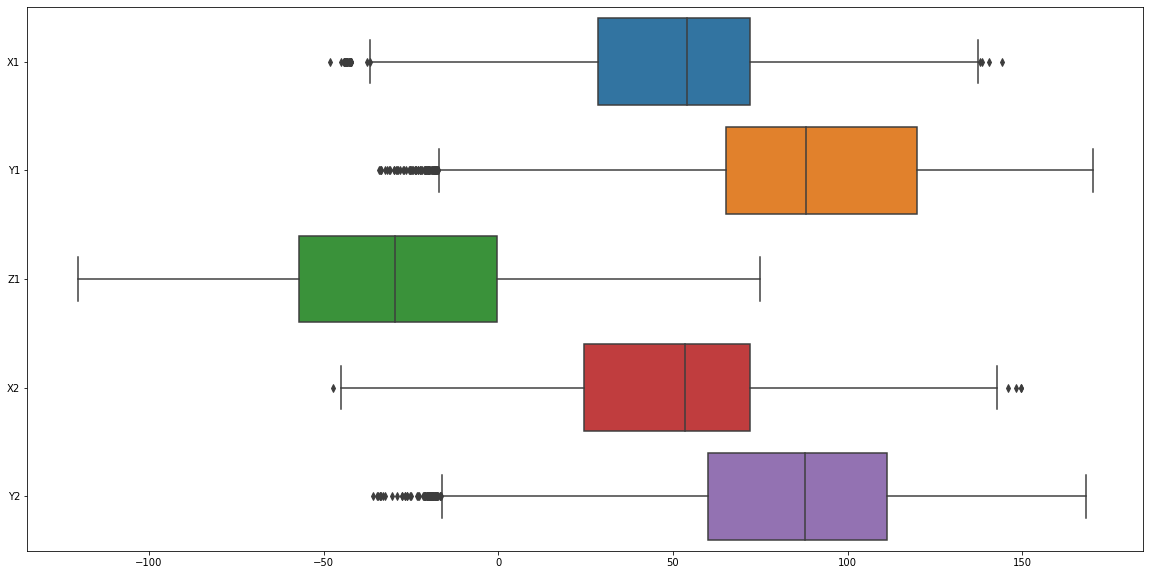

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data.iloc[:,5:10], orient="h")

In [18]:
len(data)

74295

After handling outliers, I have 74295 data left.

#### Data Number Visualization of Each Class

Here I visualized number of each class to observe how the dataset is distributed by classes.

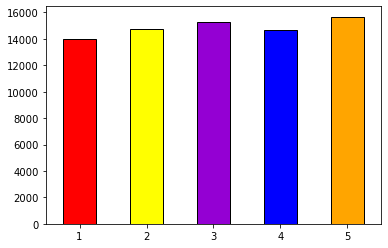

In [20]:
c = ['red', 'yellow', 'darkviolet', 'blue', 'orange']
data["Class"].value_counts().sort_index().plot(kind='bar', rot=0, color=c, edgecolor="black")
plt.show()

And after visualization I displayed that it distributed well enough so I didn't do additional process like oversampling or augmentation.

#### User Number Visualization Per Classes

Then I visualized user number for per classes because I wanted to observe if user types are effective on class decision or not.

In [22]:
df = data[["User","Class"]]

In [23]:
birler = df.loc[df['Class'] == 1].groupby("User").count()
ikiler = df.loc[df['Class'] == 2].groupby("User").count()
ucler = df.loc[df['Class'] == 3].groupby("User").count()
dortler = df.loc[df['Class'] == 4].groupby("User").count()
besler = df.loc[df['Class'] == 5].groupby("User").count()

Firstly I visualized user number of "Class 1". As you can see in the bar chart below some of the users like "10", "11", "13" prone to be in "Class 1" while some of the users like "4", "7" are opposite.

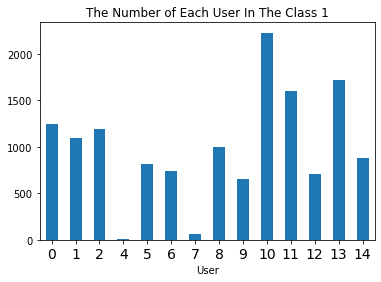

In [24]:
birler.plot(kind='bar', rot=0, legend=False)
plt.title("The Number of Each User In The Class 1")
plt.xticks(fontsize=14)
plt.show()

After that I visualized user number of "Class 3". As you can see in the pie chart below some of the users like "10", "0", "14" prone to be in "Class 3" while some of the users like "4", "7" are opposite.

After this observation I noticed that the largest number of users changed from class to class, while the least number of users ("7" and "4") remained the same. From this knowledge I inferred that probably users "4" and "7" have very less number of instance for all classes.

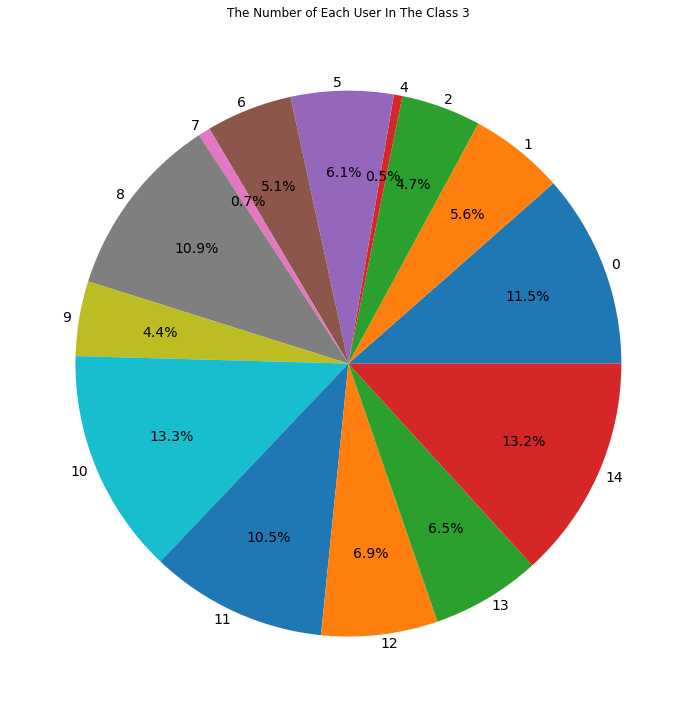

In [25]:
plt.figure(figsize=(10, 10))
plt.pie(ucler["Class"],labels=ucler.index, autopct='%.1f%%',textprops={'fontsize': 14}, pctdistance=0.7, labeldistance=1.03)
plt.title("The Number of Each User In The Class 3")
plt.tight_layout()

In order to observe my inference I plotted a grouped bar chart of the number of users per class and as I thought earlier, I see that users "4" and "7" have very less instances for each of 5 classes.

In [26]:
concat_df = pd.concat([birler,ikiler,ucler,dortler,besler], axis=1)

In [27]:
concat_df.iloc[:,-1] = concat_df.iloc[:,-1].fillna(0)
concat_df.iloc[:,-1] = concat_df.iloc[:,-1].astype(int)

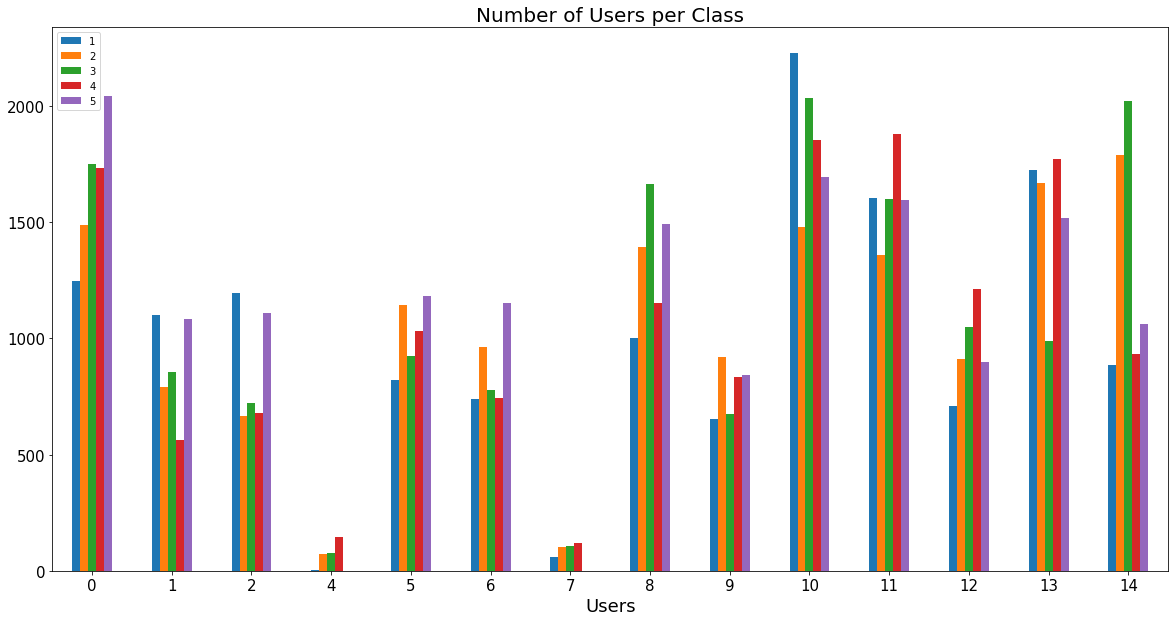

In [28]:
ax = concat_df.plot(kind='bar', rot=0, figsize=(20, 10),fontsize = 15)
ax.legend(["1","2","3","4","5",])
plt.title("Number of Users per Class",fontsize=20)
plt.xlabel("Users",fontsize=18)
plt.show()

#### Correlation Visualization

At the final step of visualization, I visualized sample correlation of 2 random attribute of my dataset and plotted it with scatter plot.

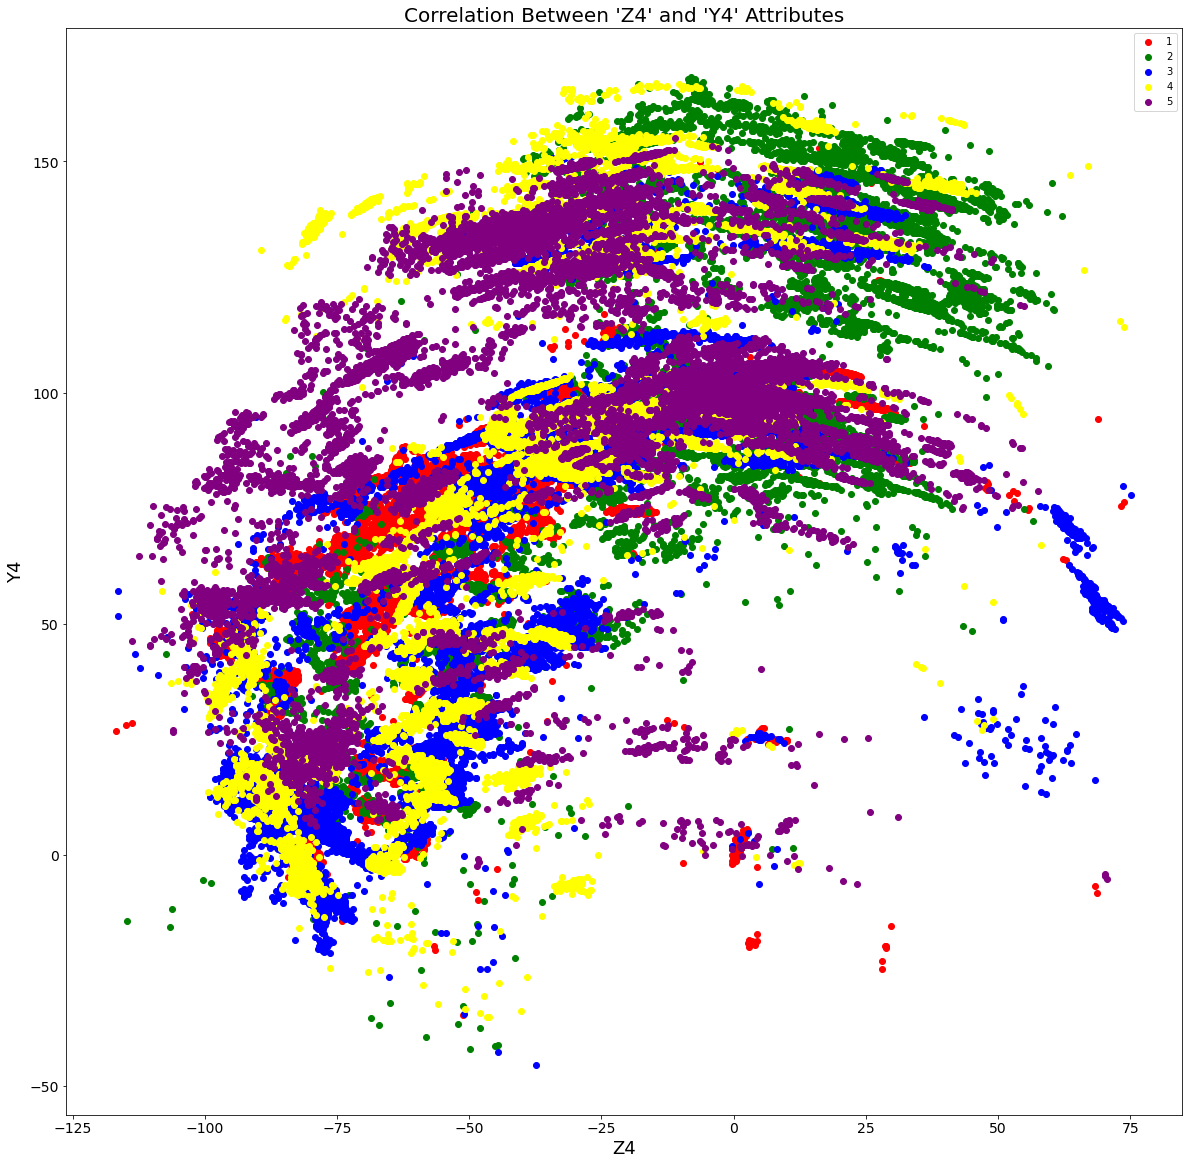

In [55]:
plt.figure(figsize=(20, 20))
plt.scatter(data[data['Class'] == 1]['Z4'], data[data['Class'] == 1]['Y4'], c="red")
plt.scatter(data[data['Class'] == 2]['Z4'], data[data['Class'] == 2]['Y4'], c="green")
plt.scatter(data[data['Class'] == 3]['Z4'], data[data['Class'] == 3]['Y4'], c="blue")
plt.scatter(data[data['Class'] == 4]['Z4'], data[data['Class'] == 4]['Y4'], c="yellow")
plt.scatter(data[data['Class'] == 5]['Z4'], data[data['Class'] == 5]['Y4'], c="purple")

plt.legend(['1','2','3','4','5'])
plt.title("Correlation Between 'Z4' and 'Y4' Attributes",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Y4",fontsize=18)
plt.xlabel("Z4",fontsize=18)

plt.show()

# Classification

Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.

But in order to train different models, firstly we must import necessary libraries.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

After importing libraries, I splitted my data as "x" and "y". "x" part contains attributes of each sample to train our models and "y" part contains classes that we will place our samples appropriately.

In [31]:
x = data.iloc[:,1:]
y = data["Class"]

In [32]:
columns = x.columns

In [33]:
x.head()

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749220,-73.684130,59.188576,10.678936,-71.297781
2,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418
3,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316
4,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146
5,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.368748,67.901260,-72.444650,61.275402,10.841109,-69.279906


In [34]:
y.head()

1    1
2    1
3    1
4    1
5    1
Name: Class, dtype: int64

After splitting attributes and classes, I normalized attributes because not all of our attributes may be in the same range. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

In [35]:
#all attributes are in the same scale
sc = StandardScaler()
x = sc.fit_transform(x)

Finally I splitted my dataset as train-test and passed to the model training phase.

In [36]:
#train-test splitting
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

#### KNN

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

Below I used k-fold cross validation to make decision between "euclidean, minkowski" values of "metric" attribute and "1,5,10" values of "n_neighbors" attribute.

In [37]:
model1 = KNeighborsClassifier()

parameters = {"metric" : ['euclidean', 'minkowski'], "n_neighbors" : [1,5,10]}
scoring = ['f1_weighted']
grid1 = GridSearchCV(estimator = model1, param_grid = parameters, cv=4, 
                     n_jobs=-1, verbose=10, refit='f1_weighted', scoring = scoring)

grid1 = grid1.fit(x_train, y_train)

# the results of the grid search (model selection according to refit metric) 
#(but evaluation will applied for all scoring metrics provided)
print("\nXtfidf1 Cross Validation Model Selection:")
print("-Best F1 Score: ",grid1.best_score_)
print("-Best Estimator: ", grid1.best_estimator_)
print("-Best Parameters: ", grid1.best_params_)

display(pd.DataFrame(data=grid1.cv_results_, columns=grid1.cv_results_.keys()))

Fitting 4 folds for each of 6 candidates, totalling 24 fits

Xtfidf1 Cross Validation Model Selection:
-Best F1 Score:  0.9231462039202807
-Best Estimator:  KNeighborsClassifier(metric='euclidean', n_neighbors=1)
-Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.013713,0.004802,37.844375,0.997878,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.923716,0.926799,0.922142,0.919928,0.923146,0.002502,1
1,0.015958,0.003664,39.108246,0.266959,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.896922,0.902928,0.896824,0.894425,0.897775,0.003139,3
2,0.020446,0.010684,27.082097,0.786054,euclidean,10,"{'metric': 'euclidean', 'n_neighbors': 10}",0.878784,0.884148,0.880638,0.874975,0.879636,0.003310,5
3,0.023188,0.004698,24.033996,0.725724,minkowski,1,"{'metric': 'minkowski', 'n_neighbors': 1}",0.923716,0.926799,0.922142,0.919928,0.923146,0.002502,1
4,0.016705,0.002940,27.100797,0.765530,minkowski,5,"{'metric': 'minkowski', 'n_neighbors': 5}",0.896922,0.902928,0.896824,0.894425,0.897775,0.003139,3
5,0.024684,0.003336,26.285229,0.765220,minkowski,10,"{'metric': 'minkowski', 'n_neighbors': 10}",0.878784,0.884148,0.880638,0.874975,0.879636,0.003310,5


#### Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Below I used k-fold cross validation to make decision between "100,10,1,0.1,0.01" values of "C" attribute.

In [38]:
model2 = LogisticRegression(random_state=0)

parameters = {"C":[100, 10, 1.0, 0.1, 0.01]}
scoring = ['f1_weighted']
grid2 = GridSearchCV(estimator = model2, param_grid = parameters, cv=4, 
                     n_jobs=-1, verbose=10, refit='f1_weighted', scoring = scoring)

grid2 = grid2.fit(x_train, y_train)

# the results of the grid search (model selection according to refit metric) 
#(but evaluation will applied for all scoring metrics provided)
print("\nXtfidf1 Cross Validation Model Selection:")
print("-Best F1 Score: ",grid2.best_score_)
print("-Best Estimator: ", grid2.best_estimator_)
print("-Best Parameters: ", grid2.best_params_)

display(pd.DataFrame(data=grid2.cv_results_, columns=grid2.cv_results_.keys()))

Fitting 4 folds for each of 5 candidates, totalling 20 fits

Xtfidf1 Cross Validation Model Selection:
-Best F1 Score:  0.623054388714849
-Best Estimator:  LogisticRegression(C=0.01, random_state=0)
-Best Parameters:  {'C': 0.01}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.843064,0.026913,0.008478,0.000498,100,{'C': 100},0.623214,0.630473,0.623646,0.611287,0.622155,0.006904,4
1,0.849047,0.022181,0.008976,0.000705,10,{'C': 10},0.623214,0.630473,0.623646,0.611287,0.622155,0.006904,4
2,0.870173,0.031739,0.009227,0.000828,1.0,{'C': 1.0},0.623208,0.630534,0.623561,0.611353,0.622164,0.006892,3
3,0.839007,0.044571,0.009973,0.001727,0.1,{'C': 0.1},0.623273,0.630900,0.623582,0.611428,0.622296,0.006978,2
4,0.604384,0.006875,0.006233,0.001087,0.01,{'C': 0.01},0.624360,0.631650,0.623683,0.612524,0.623054,0.006835,1


#### Random Forest

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks(which is our current task), the output of the random forest is the class selected by most trees.

Below I used k-fold cross validation to make decision between "sqrt, log2" values of "max_features" attribute and "10,100" values of "n_estimators" attribute.

In [39]:
model3 = RandomForestClassifier(random_state=0)

parameters = {"n_estimators" : [10,100], "max_features" : ['sqrt', 'log2']}
scoring = ['f1_weighted']
grid3 = GridSearchCV(estimator = model3, param_grid = parameters, cv=4, 
                     n_jobs=-1, verbose=10, refit='f1_weighted', scoring = scoring)

grid3 = grid3.fit(x_train, y_train)

# the results of the grid search (model selection according to refit metric) 
#(but evaluation will applied for all scoring metrics provided)
print("\nXtfidf1 Cross Validation Model Selection:")
print("-Best F1 Score: ",grid3.best_score_)
print("-Best Estimator: ", grid3.best_estimator_)
print("-Best Parameters: ", grid3.best_params_)

display(pd.DataFrame(data=grid3.cv_results_, columns=grid3.cv_results_.keys()))

Fitting 4 folds for each of 4 candidates, totalling 16 fits

Xtfidf1 Cross Validation Model Selection:
-Best F1 Score:  0.9791264308409533
-Best Estimator:  RandomForestClassifier(max_features='sqrt', random_state=0)
-Best Parameters:  {'max_features': 'sqrt', 'n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,2.352880,0.027778,0.045129,0.002854,sqrt,10,"{'max_features': 'sqrt', 'n_estimators': 10}",0.963593,0.966614,0.964073,0.964092,0.964593,0.001184,3
1,23.071490,0.263797,0.336101,0.007595,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",0.978729,0.981543,0.977502,0.978732,0.979126,0.001483,1
2,2.332015,0.011618,0.042137,0.002765,log2,10,"{'max_features': 'log2', 'n_estimators': 10}",0.963593,0.966614,0.964073,0.964092,0.964593,0.001184,3
3,21.482079,0.189204,0.235875,0.013018,log2,100,"{'max_features': 'log2', 'n_estimators': 100}",0.978729,0.981543,0.977502,0.978732,0.979126,0.001483,1


# Feature Selection

Feature selection is the process of isolating the most consistent, non-redundant, and relevant features to use in model construction. Methodically reducing the size of datasets is important as the size and variety of datasets continue to grow. The main goal of feature selection is to improve the performance of a predictive model and reduce the computational cost of modeling.

So I selected most relevant 10 features and observed if they gives similar performance with models that trained with all of the features.

In [40]:
# random forest for feature importance on a classification problem

# Train a random forest model on the data
model = RandomForestClassifier()
model.fit(x, y)

# Calculate permutation importance for each feature
importances = permutation_importance(model, x, y, n_repeats=10, random_state=42)

# Sort the feature importances in descending order
sorted_idx = importances.importances_mean.argsort()[::-1]

In [41]:
for f in range(x.shape[1]):
    print("{}.Feature : {} ({:.3f})".format(f + 1, columns[sorted_idx[f]], importances.importances_mean[sorted_idx[f]]))

1.Feature : Y4 (0.099)
2.Feature : Z4 (0.095)
3.Feature : Z3 (0.083)
4.Feature : Y3 (0.082)
5.Feature : Y2 (0.080)
6.Feature : Y1 (0.068)
7.Feature : Z0 (0.062)
8.Feature : Y0 (0.058)
9.Feature : Z2 (0.057)
10.Feature : Z1 (0.034)
11.Feature : User (0.020)
12.Feature : X0 (0.015)
13.Feature : X2 (0.014)
14.Feature : X3 (0.011)
15.Feature : X1 (0.010)
16.Feature : X4 (0.010)


In [42]:
x2 = data.iloc[:,1:]

In [43]:
x2 = x2[columns[sorted_idx[:10]]]

In [44]:
x2.head()

,Y4,Z4,Z3,Y3,Y2,Y1,Z0,Y0,Z2,Z1
1,10.678936,-71.297781,-73.684130,67.749220,81.680557,42.462500,-64.807709,71.466776,-52.919272,-72.780545
2,11.779919,-68.827418,-70.703991,68.400808,43.254091,82.538530,-61.935252,72.266609,-69.982489,-49.596509
3,11.793440,-68.889316,-71.138344,68.907925,43.567403,82.631347,-62.562788,72.469064,-70.658489,-50.606259
4,42.717833,-72.015146,-68.956425,11.250648,68.214645,81.868749,-63.688956,71.707275,-72.228461,-52.752784
5,10.841109,-69.279906,-72.444650,67.901260,42.426849,81.556874,-64.177303,71.435607,-72.574743,-53.475747


In [45]:
#all attributes are in the same scale
sc = StandardScaler()
x2 = sc.fit_transform(x2)

In [46]:
#train-test split
x_train2, x_test2, y_train, y_test = train_test_split(x2,y,test_size=0.25, random_state=0)

After feature selection, I trained same classification algorithms and applied k-fold cross validation on same attributes of each classifier.

#### KNN

In [47]:
model4 = KNeighborsClassifier()

parameters = {"metric" : ['euclidean', 'minkowski'], "n_neighbors" : [1,5,10]}
scoring = ['f1_weighted']
grid4 = GridSearchCV(estimator = model4, param_grid = parameters, cv=4, 
                     n_jobs=-1, verbose=10, refit='f1_weighted', scoring = scoring)

grid4 = grid4.fit(x_train2, y_train)

# the results of the grid search (model selection according to refit metric) 
#(but evaluation will applied for all scoring metrics provided)
print("\nXtfidf1 Cross Validation Model Selection:")
print("-Best F1 Score: ",grid4.best_score_)
print("-Best Estimator: ", grid4.best_estimator_)
print("-Best Parameters: ", grid4.best_params_)

display(pd.DataFrame(data=grid4.cv_results_, columns=grid4.cv_results_.keys()))

Fitting 4 folds for each of 6 candidates, totalling 24 fits

Xtfidf1 Cross Validation Model Selection:
-Best F1 Score:  0.9143005611300491
-Best Estimator:  KNeighborsClassifier(metric='euclidean', n_neighbors=1)
-Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.206946,0.006963,1.557087,0.045493,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.916300,0.917103,0.909521,0.914279,0.914301,0.002945,1
1,0.192984,0.002685,3.195457,0.068261,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.882215,0.888637,0.879565,0.880124,0.882635,0.003603,3
2,0.205949,0.003193,4.428660,0.115936,euclidean,10,"{'metric': 'euclidean', 'n_neighbors': 10}",0.860367,0.863970,0.860347,0.861233,0.861479,0.001482,5
3,0.202958,0.001115,1.536891,0.018618,minkowski,1,"{'metric': 'minkowski', 'n_neighbors': 1}",0.916300,0.917103,0.909521,0.914279,0.914301,0.002945,1
4,0.206445,0.005326,3.212661,0.071065,minkowski,5,"{'metric': 'minkowski', 'n_neighbors': 5}",0.882215,0.888637,0.879565,0.880124,0.882635,0.003603,3
5,0.202957,0.002950,3.584666,0.045907,minkowski,10,"{'metric': 'minkowski', 'n_neighbors': 10}",0.860367,0.863970,0.860347,0.861233,0.861479,0.001482,5


#### Logistic Regression

In [48]:
model5 = LogisticRegression(random_state=0)

parameters = {"C":[100, 10, 1.0, 0.1, 0.01]}
scoring = ['f1_weighted']
grid5 = GridSearchCV(estimator = model5, param_grid = parameters, cv=4, 
                     n_jobs=-1, verbose=10, refit='f1_weighted', scoring = scoring)

grid5 = grid5.fit(x_train2, y_train)

# the results of the grid search (model selection according to refit metric) 
#(but evaluation will applied for all scoring metrics provided)
print("\nXtfidf1 Cross Validation Model Selection:")
print("-Best F1 Score: ",grid5.best_score_)
print("-Best Estimator: ", grid5.best_estimator_)
print("-Best Parameters: ", grid5.best_params_)

display(pd.DataFrame(data=grid5.cv_results_, columns=grid5.cv_results_.keys()))

Fitting 4 folds for each of 5 candidates, totalling 20 fits

Xtfidf1 Cross Validation Model Selection:
-Best F1 Score:  0.5252536611265222
-Best Estimator:  LogisticRegression(C=100, random_state=0)
-Best Parameters:  {'C': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.684420,0.023909,0.007979,8.150813e-07,100,{'C': 100},0.525651,0.531745,0.527329,0.516290,0.525254,0.005634,1
1,0.716835,0.024986,0.008476,4.985942e-04,10,{'C': 10},0.525651,0.531670,0.527329,0.516290,0.525235,0.005612,2
2,0.742765,0.038784,0.010721,1.780621e-03,1.0,{'C': 1.0},0.525655,0.531670,0.527240,0.516290,0.525214,0.005604,3
3,0.732043,0.011780,0.011221,2.271352e-03,0.1,{'C': 0.1},0.525459,0.531633,0.527120,0.516163,0.525094,0.005629,5
4,0.486948,0.026211,0.006233,8.269935e-04,0.01,{'C': 0.01},0.525495,0.531795,0.526754,0.516344,0.525097,0.005576,4


#### Random Forest

In [49]:
model6 = RandomForestClassifier(random_state=0)

parameters = {"n_estimators" : [10,100], "max_features" : ['sqrt', 'log2']}
scoring = ['f1_weighted']
grid6 = GridSearchCV(estimator = model6, param_grid = parameters, cv=4, 
                     n_jobs=-1, verbose=10, refit='f1_weighted', scoring = scoring)

grid6 = grid6.fit(x_train2, y_train)

# the results of the grid search (model selection according to refit metric) 
#(but evaluation will applied for all scoring metrics provided)
print("\nXtfidf1 Cross Validation Model Selection:")
print("-Best F1 Score: ",grid6.best_score_)
print("-Best Estimator: ", grid6.best_estimator_)
print("-Best Parameters: ", grid6.best_params_)

display(pd.DataFrame(data=grid6.cv_results_, columns=grid6.cv_results_.keys()))

Fitting 4 folds for each of 4 candidates, totalling 16 fits

Xtfidf1 Cross Validation Model Selection:
-Best F1 Score:  0.955866168509978
-Best Estimator:  RandomForestClassifier(max_features='sqrt', random_state=0)
-Best Parameters:  {'max_features': 'sqrt', 'n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,1.926350,0.034760,0.042137,0.001635,sqrt,10,"{'max_features': 'sqrt', 'n_estimators': 10}",0.935149,0.940367,0.933288,0.936980,0.936446,0.002613,3
1,18.949589,0.156661,0.340839,0.018889,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",0.954047,0.959602,0.952723,0.957093,0.955866,0.002676,1
2,1.972726,0.031110,0.046875,0.005508,log2,10,"{'max_features': 'log2', 'n_estimators': 10}",0.935149,0.940367,0.933288,0.936980,0.936446,0.002613,3
3,17.556814,0.069243,0.248860,0.006492,log2,100,"{'max_features': 'log2', 'n_estimators': 100}",0.954047,0.959602,0.952723,0.957093,0.955866,0.002676,1


# Conclusion

As you can see in the table and graph below, dimension reduction slightly reduced the success of our model. Other than this, it shows that most succesfull algorithm on classification of this dataset is Random Forest classification algorithm. So I chosed to use "model3" to make prediction on the test dataset.

| Model Name | Attribute Count | Feature Selection | Tuning | Validation F1 Score |
| --- | --- | --- | --- | --- |
| model1 | 16 | NO | KNeighborsClassifier(metric='euclidean', n_neighbors=1) | 0.923 |
| model2 | 16 | NO | LogisticRegression(C=0.01) | 0.623 |
| model3 | 16 | NO | RandomForestClassifier(max_features='sqrt') | 0.979 |
| model4 | 10 | YES | KNeighborsClassifier(metric='euclidean', n_neighbors=1) | 0.914 |
| model5 | 10 | YES | LogisticRegression(C=100) | 0.525 |
| model6 | 10 | YES | RandomForestClassifier(max_features='sqrt') | 0.956 |

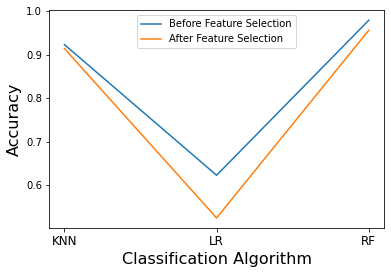

In [50]:
temp_df =pd.DataFrame({
                       'Before Feature Selection': [0.923, 0.623, 0.979],
                       'After Feature Selection': [0.914, 0.525, 0.956]
                       })

lines = temp_df.plot.line()
plt.xticks([0,1,2],["KNN", "LR", "RF"],fontsize=12)
plt.xlabel("Classification Algorithm",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.show()

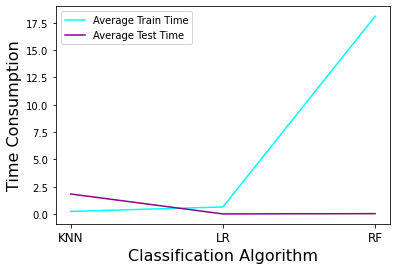

In [51]:
temp_df =pd.DataFrame({
                       'Average Train Time': [0.234870, 0.647019, 18.088640],
                       'Average Test Time': [1.828861, 0.007979, 0.032923]
                       })

lines = temp_df.plot.line(color=["cyan", "darkmagenta"])
plt.xticks([0,1,2],["KNN", "LR", "RF"],fontsize=12)
plt.xlabel("Classification Algorithm",fontsize=16)
plt.ylabel("Time Consumption",fontsize=16)
plt.show()

In the above, I plotted time consumptions of each algorithm additionally to better understand our algorithms. And I realized that KNN's time consumption is higher in testing time while Logistic Regression's and Random Forest's time consumptions are higher in the training step.

#### Prediction With Best Algorithm

As I mentioned earlier, I chosed "model3" for predicting the test value and I isualized testing results of it below.

In [52]:
# So I chose model3 (because it has the best f1 score) and predicted test data and printed confusion_matrix
from sklearn.metrics import classification_report

y_pred = grid3.best_estimator_.predict(x_test)

print("Classification Report (Testing Results)")
print(classification_report(y_test, y_pred))
print("\n")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Classification Report (Testing Results)
              precision    recall  f1-score   support

           1       1.00      0.99      0.99      3463
           2       0.98      0.98      0.98      3654
           3       0.98      0.98      0.98      3835
           4       0.98      0.97      0.98      3698
           5       0.98      0.99      0.99      3924

    accuracy                           0.98     18574
   macro avg       0.98      0.98      0.98     18574
weighted avg       0.98      0.98      0.98     18574



Confusion Matrix
[[3444   12    6    0    1]
 [   4 3577   11   26   36]
 [   8    6 3770   33   18]
 [   4   36   70 3578   10]
 [   0   20    5    1 3898]]


------------------Confusion Matrix Heat Map------------------


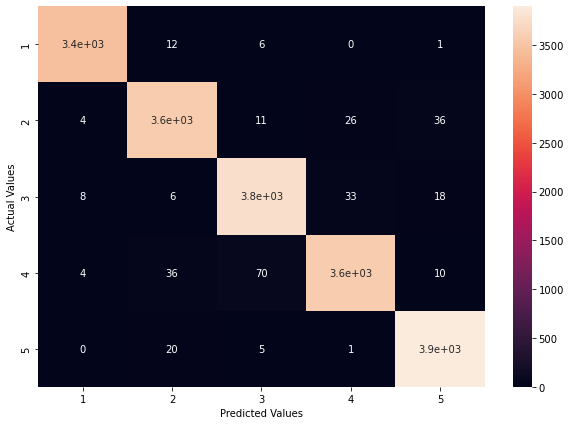

In [53]:
import seaborn as sn
print("------------------Confusion Matrix Heat Map------------------")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()